<a href="https://colab.research.google.com/github/atharvmendhe18/atharvmendhe18/blob/main/CS50AI_Lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/25
500/500 [==============================] - 24s 44ms/step - loss: 3.2407 - accuracy: 0.1337 - val_loss: 2.3013 - val_accuracy: 0.3554
Epoch 2/25
500/500 [==============================] - 24s 48ms/step - loss: 1.9187 - accuracy: 0.4277 - val_loss: 1.2243 - val_accuracy: 0.6425
Epoch 3/25
500/500 [==============================] - 20s 40ms/step - loss: 1.2151 - accuracy: 0.6122 - val_loss: 0.8186 - val_accuracy: 0.7560
Epoch 4/25
500/500 [==============================] - 22s 44ms/step - loss: 0.8856 - accuracy: 0.7145 - val_loss: 0.6442 - val_accuracy: 0.8106
Epoch 5/25
500/500 [==============================] - 20s 40ms/step - loss: 0.7101 - accuracy: 0.7715 - val_loss: 0.4921 - val_accuracy: 0.8500
Epoch 6/25
500/500 [==============================] - 21s 42ms/step - loss: 0.5639 - accuracy: 0.8192 - val_loss: 0.3953 - val_accuracy: 0.8866
Epoch 7/25
500/500 [==============================] - 20s 40ms/step - loss: 0.4776 - accuracy: 0.8464 - val_loss: 0.3225 - val_accuracy:

Model saved to mymodel7.
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


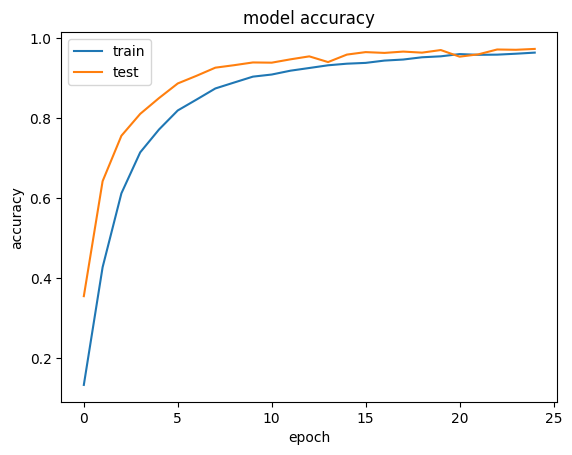

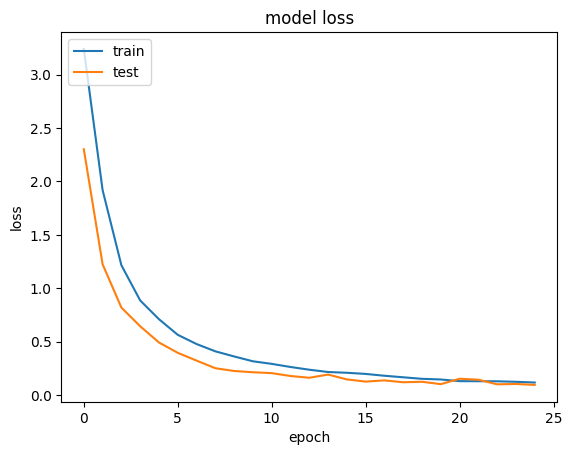

In [ ]:
from keras.layers.attention.multi_head_attention import activation
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

EPOCHS = 25
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4


def main():
    # Check command-line arguments
    if len(sys.argv) not in [2, 3]:
        sys.exit("Usage: python traffic.py data_directory [model.h5]")

    # Get image arrays and labels for all image files
    images, labels = load_data("gtsrb")

    # Split data into training and testing sets
    labels = tf.keras.utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), test_size=TEST_SIZE
    )

    # Get a compiled neural network
    model = get_model()



    # Fit model on training data
    history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=EPOCHS)

    # Evaluate neural network performance
    model.evaluate(x_test, y_test, verbose=2)

    # Save model to file

    model.save("my_model7")
    print(f"Model saved to mymodel7.")

    print(history.history.keys())


    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()


    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()


def load_data(data_dir):

    images = []
    labels = []

    for i in range(43):
        folder_to_view = os.listdir(f"{data_dir}/{i}")
        for image_to_read in folder_to_view:
            image = cv2.imread(f"{data_dir}/{i}/{image_to_read}")
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, dsize=(30,30))
            image = image.astype(np.float32) / 255.0
            images.append(image)
            labels.append(i)

    return (images, labels)

    raise NotImplementedError


def get_model():


    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu", input_shape = (IMG_WIDTH, IMG_HEIGHT,3)))

    model.add(tf.keras.layers.MaxPooling2D())

    model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu", input_shape = (IMG_WIDTH, IMG_HEIGHT,3)))

    model.add(tf.keras.layers.MaxPooling2D())

    model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu", input_shape = (IMG_WIDTH, IMG_HEIGHT,3)))

    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(100, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3), activation = "relu"))

    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax"))

    model.compile(
        optimizer="adam",
        loss = "categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

    raise NotImplementedError


if __name__ == "__main__":
    main()


In [ ]:
!wget https://cdn.cs50.net/ai/2020/x/projects/5/gtsrb.zip

In [ ]:
!unzip gtsrb

1/1 [==============================] - 0s 86ms/step
0


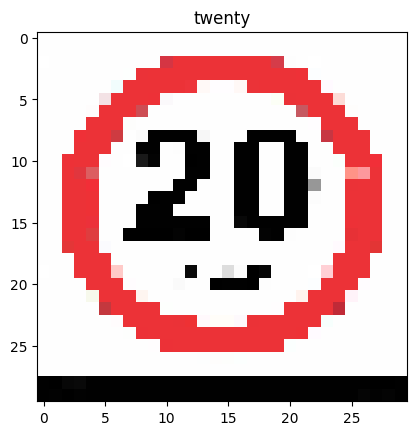

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('my_model6')

image_path = "illustration-of-20-kmh-speed-limit-traffic-sign-T830AY.jpg"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, dsize=(30,30))
image = image.astype(np.float32) / 255.0

predicted_classes = model.predict(np.expand_dims(image, axis=0))

traffic_signs_labels = ["twenty", "thirty"]
for i in range(2,43):
  traffic_signs_labels.append(i)

predicted_class_index = np.argmax(predicted_classes)

predicted_label = traffic_signs_labels[predicted_class_index]
print(predicted_class_index)

plt.imshow(image)
plt.title(predicted_label)
plt.show()


In [ ]:
!wget https://cdn4.vectorstock.com/i/1000x1000/80/33/maximum-speed-limit-100-sign-flat-icon-vector-14488033.jpg

In [ ]:
!wget https://cdn.shakedeal.com/images/thumbnails/330/330/detailed/239/SDASL0022600.jpg?t=1545143837

In [ ]:
!wget https://c8.alamy.com/comp/T830AY/illustration-of-20-kmh-speed-limit-traffic-sign-T830AY.jpg